In [32]:
import pandas as pd
import numpy as np
import regex as re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns



In [33]:
df_B_1 = pd.read_csv("data/hotels_Barcelona_12_September_2025_18_September_2025.csv")
df_B_2 = pd.read_csv("data/hotels_Barcelona_19_September_2025_25_September_2025.csv")
df_L_1 = pd.read_csv("data/hotels_Lisbon_12_September_2025_18_September_2025.csv")
df_L_2 = pd.read_csv("data/hotels_Lisbon_19_September_2025_25_September_2025.csv")



# Data

In [34]:
print(df_B_1.shape)
print(df_B_2.shape)
print(df_L_1.shape)
print(df_L_2.shape)

(939, 5)
(937, 5)
(999, 5)
(998, 5)


In [35]:
common_hotels_B = set(df_B_1['name']).intersection(df_B_2['name'])
common_hotels_L = set(df_L_1['name']).intersection(df_L_2['name'])

df_B_1_common = df_B_1[df_B_1['name'].isin(common_hotels_B)].reset_index(drop=True)
df_B_2_common = df_B_2[df_B_2['name'].isin(common_hotels_B)].reset_index(drop=True)

df_L_1_common = df_L_1[df_L_1['name'].isin(common_hotels_L)].reset_index(drop=True)
df_L_2_common = df_L_2[df_L_2['name'].isin(common_hotels_L)].reset_index(drop=True)

print(df_B_1_common.shape)
print(df_B_2_common.shape)
print(df_L_1_common.shape)
print(df_L_2_common.shape)

(600, 5)
(600, 5)
(845, 5)
(845, 5)


In [36]:
# merge Barcelona

# Standardize the 'name' column: strip whitespace and convert to lowercase
df_B_1_common['name'] = df_B_1_common['name'].str.strip().str.lower()
df_B_2_common['name'] = df_B_2_common['name'].str.strip().str.lower()

# Merge on 'name' with suffixes to differentiate columns
merged_df_B = pd.merge(
    df_B_1_common,
    df_B_2_common,
    on='name',
    how='inner',
    suffixes=('_1', '_2')
)

print("Merged DataFrame:")
print(merged_df_B.shape)
merged_df_B.head(40)


Merged DataFrame:
(600, 9)


,name,description_1,rating_1,reviews_1,price_1,description_2,rating_2,reviews_2,price_2
0,unite hostel barcelona,Reliable info:Guests say the description and p...,8.0,8408.0,1284.0,Reliable info:Guests say the description and p...,8.0,8408.0,1935.0
1,pensión coral,"Located behind Sant Jaume Square, this guest h...",7.8,3060.0,603.0,Reliable info:Guests say the description and p...,7.8,3060.0,603.0
2,apartaments sant jordi girona 97,Reliable info:Guests say the description and p...,8.2,1344.0,1067.0,Reliable info:Guests say the description and p...,8.2,1344.0,1367.0
3,ronda house,Ronda House is set just off Ronda Sant Antoni ...,8.4,9740.0,1049.0,Reliable info:Guests say the description and p...,8.4,9740.0,976.0
4,ecozentric,"Ecozentric is in central Barcelona, just a 5-m...",7.4,1634.0,813.0,"Ecozentric is in central Barcelona, just a 5-m...",7.4,1634.0,813.0
5,gaudi hotel,Reliable info:Guests say the description and p...,8.3,7263.0,1308.0,Just 164 feet from Barcelona's famous Las Ramb...,8.3,7263.0,1274.0
6,charmsuites paralel,Reliable info:Guests say the description and p...,7.7,1548.0,1103.0,Reliable info:Guests say the description and p...,7.7,1548.0,1083.0
7,hostal operaramblas,Hostal Operaramblas is located less than 328 f...,8.8,5883.0,855.0,Reliable info:Guests say the description and p...,8.8,5883.0,940.0
8,my address in plaza real,Reliable info:Guests say the description and p...,7.9,194.0,1035.0,Reliable info:Guests say the description and p...,7.9,194.0,1247.0
9,hostalin barcelona passeig de gracia,"Hostalin Barcelona is located in Barcelona, 65...",7.4,1769.0,908.0,"Hostalin Barcelona is located in Barcelona, 65...",7.4,1769.0,876.0


In [6]:
# merge Lisboa

# Standardize the 'name' column: strip whitespace and convert to lowercase
df_L_1_common['name'] = df_L_1_common['name'].str.strip().str.lower()
df_L_2_common['name'] = df_L_2_common['name'].str.strip().str.lower()

# Merge on 'name' with suffixes to differentiate columns
merged_df_L = pd.merge(
    df_L_1_common,
    df_L_2_common,
    on='name',
    how='inner',
    suffixes=('_1', '_2')
)

print("Merged DataFrame:")
print(merged_df_L.shape)
merged_df_L.head(30)

Merged DataFrame:
(845, 9)


,name,description_1,rating_1,reviews_1,price_1,description_2,rating_2,reviews_2,price_2
0,exe liberdade,"EXE Liberdade is set in Lisbon, 1640 feet from...",8.4,5147.0,4741.0,Reliable info:Guests say the description and p...,8.4,5148.0,2409.0
1,locke de santa joana,Reliable info:Guests say the description and p...,8.8,475.0,1842.0,Reliable info:Guests say the description and p...,8.8,476.0,1593.0
2,casa da avenida lisboa,Reliable info:Guests say the description and p...,9.3,269.0,2602.0,Reliable info:Guests say the description and p...,9.3,270.0,2689.0
3,alfama yellow house,Featuring accommodations in apartments and stu...,7.2,850.0,696.0,Featuring accommodations in apartments and stu...,7.2,850.0,874.0
4,"costa do castelo terrace, em rua dos lagares 8",Reliable info:Guests say the description and p...,8.3,575.0,816.0,Reliable info:Guests say the description and p...,8.3,575.0,780.0
5,lisbon art stay apartments baixa,Reliable info:Guests say the description and p...,8.9,4076.0,858.0,Reliable info:Guests say the description and p...,8.9,4079.0,858.0
6,chiado 44,Reliable info:Guests say the description and p...,8.6,1653.0,1339.0,"Chiado 44 offers accommodations in Lisbon, 1.9...",8.6,1651.0,1285.0
7,lisbon five stars apartments bica,Reliable info:Guests say the description and p...,8.5,518.0,2093.0,Reliable info:Guests say the description and p...,8.5,518.0,1716.0
8,alfama right point,Reliable info:Guests say the description and p...,8.7,698.0,1010.0,Reliable info:Guests say the description and p...,8.7,698.0,839.0
9,cais urban lodge,Reliable info:Guests say the description and p...,8.8,1479.0,922.0,Reliable info:Guests say the description and p...,8.8,1479.0,922.0


Check differences in variables for the same hotels.

In [7]:
# Barcelona

# List of columns to compare
columns_to_compare = ['rating', 'reviews']

# Initialize an empty DataFrame to store differences
differences = pd.DataFrame(columns=['name', 'column', '1_value', '2_value'])

# Iterate through each column and identify differences
for column in columns_to_compare:
    col_df1 = f"{column}_1"
    col_df2 = f"{column}_2"
    
    # Boolean mask where values differ
    mask = merged_df_B[col_df1] != merged_df_B[col_df2]
    
    # Extract differing rows
    diff_rows = merged_df_B.loc[mask, ['name', col_df1, col_df2]]
    
    # Add a 'column' identifier
    diff_rows = diff_rows.rename(columns={col_df1: '1_value', col_df2: '2_value'})
    diff_rows['column'] = column
    
    # Append to the differences DataFrame
    differences = pd.concat([differences, diff_rows[['name', 'column', '1_value', '2_value']]], ignore_index=True)

print(differences.shape)
differences.head()


(6, 4)


/var/folders/yl/blfh275s3xq56mz3wkmfnrzh0000gn/T/ipykernel_50876/2997468031.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  differences = pd.concat([differences, diff_rows[['name', 'column', '1_value', '2_value']]], ignore_index=True)


,name,column,1_value,2_value
0,apartment sants-montjuïc- avenida madrid by in...,rating,7.2,7.3
1,catalonia eixample 1864,reviews,4299.0,4298.0
2,vincci mae,reviews,2568.0,2567.0
3,el avenida palace,reviews,5239.0,5238.0
4,brustar sagrada familia,reviews,757.0,756.0


It is weird that the number of reviews or the rating of the hotels changes but the deviation is neglegible. 

In [8]:
# Lisbon

# List of columns to compare
columns_to_compare = ['rating', 'reviews', 'description']

# Initialize an empty DataFrame to store differences
differences = pd.DataFrame(columns=['name', 'column', '1_value', '2_value'])

# Iterate through each column and identify differences
for column in columns_to_compare:
    col_df1 = f"{column}_1"
    col_df2 = f"{column}_2"
    
    # Boolean mask where values differ
    mask = merged_df_L[col_df1] != merged_df_L[col_df2]
    
    # Extract differing rows
    diff_rows = merged_df_L.loc[mask, ['name', col_df1, col_df2]]
    
    # Add a 'column' identifier
    diff_rows = diff_rows.rename(columns={col_df1: '1_value', col_df2: '2_value'})
    diff_rows['column'] = column
    
    # Append to the differences DataFrame
    differences = pd.concat([differences, diff_rows[['name', 'column', '1_value', '2_value']]], ignore_index=True)

print(differences.shape)
differences.head(20)


(361, 4)


/var/folders/yl/blfh275s3xq56mz3wkmfnrzh0000gn/T/ipykernel_50876/4043868455.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  differences = pd.concat([differences, diff_rows[['name', 'column', '1_value', '2_value']]], ignore_index=True)


,name,column,1_value,2_value
0,lisboa prata boutique hotel,rating,7.9,8.0
1,new style lisbon hotel,rating,8.9,9.0
2,whome carrião 31 urban oasis in premium locati...,rating,8.0,7.8
3,czar lisbon hotel,rating,8.2,8.1
4,garden campo de ourique guest house - hostel,rating,8.6,8.7
5,chiado square apartments | lisbon best apartments,rating,9.5,9.6
6,explore vibrant lisbon from a designer loft at...,rating,9.4,9.5
7,"deluxe apt at amazing prime location, by timec...",rating,9.3,9.4
8,cozy flat in the heart of lisbon,rating,0.0,9.0
9,bliss lisbon apartments - avenidas,rating,8.1,8.2


A lot of deviations but the deviations a are neglegible. The deviations in ratings and reviews are most likely due to the fact that the two weeks were scraped sequentially and new reviews and ratings have been added in the mean time. Since the deviations are so small we will just use the second value for ratings and reviews.
It also seems like the deviations in the descriptions are due to the fact that the description sometimes contains the reliable info flag in one week and not in the other. This we will check in the next part.

# Text Cleaning


When scraping the description we also scraped flags that are provided by booking.com and are not really part of the hotel's description. One flag indicates that previous guestas found the information provided in the description to be reliable. We use that to create a feature called reliable info and then remove it from the description.


In [9]:
start_pattern = re.compile(r'^Reliable Info:.*?\.', re.IGNORECASE )
end_pattern = re.compile(r"Distance in property description is calculated using © OpenStreetMap")

# Barcelona
merged_df_B['match_start'] = merged_df_B.description_2.apply(lambda x: start_pattern.search(x))
merged_df_B['reliable_info'] = merged_df_B['match_start'].notna().astype(int)
print("#times Reliable Info pattern appears at the start of description in Barcelona")
print(merged_df_B['match_start'].isna().sum())

merged_df_B['match_end'] = merged_df_B.description_2.apply(lambda x: end_pattern.search(x))
print("#times end pattern does not appear at the start of description in Barcelona")
print(merged_df_B['match_end'].isna().sum())

# Lisbon
merged_df_L['match_start'] = merged_df_L.description_2.apply(lambda x: start_pattern.search(x))
merged_df_L['reliable_info'] = merged_df_L['match_start'].notna().astype(int)
print("#times Reliable Info pattern does not appear at the start of description in Lisbon")
print(merged_df_L['match_start'].isna().sum())

merged_df_L['match_end'] = merged_df_L.description_2.apply(lambda x: end_pattern.search(x))
print("#times end pattern does not appear at the start of description in Lisbon")
print(merged_df_L['match_end'].isna().sum())





#times Reliable Info pattern appears at the start of description in Barcelona
305
#times end pattern does not appear at the start of description in Barcelona
0
#times Reliable Info pattern does not appear at the start of description in Lisbon
328
#times end pattern does not appear at the start of description in Lisbon
0


The end pattern is detected in all descriptions, so we can easily remove it.

In [10]:
merged_df_B.head()

,name,description_1,rating_1,reviews_1,price_1,description_2,rating_2,reviews_2,price_2,match_start,reliable_info,match_end
0,unite hostel barcelona,Reliable info:Guests say the description and p...,8.0,8408.0,1284.0,Reliable info:Guests say the description and p...,8.0,8408.0,1935.0,"<regex.Match object; span=(0, 83), match='Reli...",1,"<regex.Match object; span=(781, 849), match='D..."
1,pensión coral,"Located behind Sant Jaume Square, this guest h...",7.8,3060.0,603.0,Reliable info:Guests say the description and p...,7.8,3060.0,603.0,"<regex.Match object; span=(0, 83), match='Reli...",1,"<regex.Match object; span=(1016, 1084), match=..."
2,apartaments sant jordi girona 97,Reliable info:Guests say the description and p...,8.2,1344.0,1067.0,Reliable info:Guests say the description and p...,8.2,1344.0,1367.0,"<regex.Match object; span=(0, 83), match='Reli...",1,"<regex.Match object; span=(723, 791), match='D..."
3,ronda house,Ronda House is set just off Ronda Sant Antoni ...,8.4,9740.0,1049.0,Reliable info:Guests say the description and p...,8.4,9740.0,976.0,"<regex.Match object; span=(0, 83), match='Reli...",1,"<regex.Match object; span=(795, 863), match='D..."
4,ecozentric,"Ecozentric is in central Barcelona, just a 5-m...",7.4,1634.0,813.0,"Ecozentric is in central Barcelona, just a 5-m...",7.4,1634.0,813.0,None,0,"<regex.Match object; span=(864, 932), match='D..."


In [11]:
# Removing both patterns from description
# Function to remove both pattern using regex
def remove_regex_pattern(text, regex):
    return re.sub(regex, '', text).strip()

# Apply the regex-based removal
## Barcelona
merged_df_B['description_1'] = merged_df_B['description_1'].apply(lambda x: remove_regex_pattern(x, start_pattern))
merged_df_B['description_1'] = merged_df_B['description_1'].apply(lambda x: remove_regex_pattern(x, end_pattern))

merged_df_B['description_2'] = merged_df_B['description_2'].apply(lambda x: remove_regex_pattern(x, start_pattern))
merged_df_B['description_2'] = merged_df_B['description_2'].apply(lambda x: remove_regex_pattern(x, end_pattern))

## Lisbon
merged_df_L['description_1'] = merged_df_L['description_1'].apply(lambda x: remove_regex_pattern(x, start_pattern))
merged_df_L['description_1'] = merged_df_L['description_1'].apply(lambda x: remove_regex_pattern(x, end_pattern))

merged_df_L['description_2'] = merged_df_L['description_2'].apply(lambda x: remove_regex_pattern(x, start_pattern))
merged_df_L['description_2'] = merged_df_L['description_2'].apply(lambda x: remove_regex_pattern(x, end_pattern))
                            


In [12]:
merged_df_L.head()

,name,description_1,rating_1,reviews_1,price_1,description_2,rating_2,reviews_2,price_2,match_start,reliable_info,match_end
0,exe liberdade,"EXE Liberdade is set in Lisbon, 1640 feet from...",8.4,5147.0,4741.0,"EXE Liberdade is set in Lisbon, 1640 feet from...",8.4,5148.0,2409.0,"<regex.Match object; span=(0, 88), match='Reli...",1,"<regex.Match object; span=(787, 855), match='D..."
1,locke de santa joana,"Providing a seasonal outdoor swimming pool, Lo...",8.8,475.0,1842.0,"Providing a seasonal outdoor swimming pool, Lo...",8.8,476.0,1593.0,"<regex.Match object; span=(0, 88), match='Reli...",1,"<regex.Match object; span=(1135, 1203), match=..."
2,casa da avenida lisboa,Casa da Avenida Lisboa is a 4-bedroom apartmen...,9.3,269.0,2602.0,Casa da Avenida Lisboa is a 4-bedroom apartmen...,9.3,270.0,2689.0,"<regex.Match object; span=(0, 88), match='Reli...",1,"<regex.Match object; span=(621, 689), match='D..."
3,alfama yellow house,Featuring accommodations in apartments and stu...,7.2,850.0,696.0,Featuring accommodations in apartments and stu...,7.2,850.0,874.0,None,0,"<regex.Match object; span=(1056, 1124), match=..."
4,"costa do castelo terrace, em rua dos lagares 8","Costa do Castelo Terrace, em Rua dos Lagares 8...",8.3,575.0,816.0,"Costa do Castelo Terrace, em Rua dos Lagares 8...",8.3,575.0,780.0,"<regex.Match object; span=(0, 88), match='Reli...",1,"<regex.Match object; span=(1109, 1177), match=..."


Lets compare again whether the descriptions from the two weeks differ for each hotel.

In [13]:
# Barcelona

# List of columns to compare
columns_to_compare = ['description']

# Initialize an empty DataFrame to store differences
differences = pd.DataFrame(columns=['name', 'column', '1_value', '2_value'])

# Iterate through each column and identify differences
for column in columns_to_compare:
    col_df1 = f"{column}_1"
    col_df2 = f"{column}_2"
    
    # Boolean mask where values differ
    mask = merged_df_B[col_df1] != merged_df_B[col_df2]
    
    # Extract differing rows
    diff_rows = merged_df_B.loc[mask, ['name', col_df1, col_df2]]
    
    # Add a 'column' identifier
    diff_rows = diff_rows.rename(columns={col_df1: '1_value', col_df2: '2_value'})
    diff_rows['column'] = column
    
    # Append to the differences DataFrame
    differences = pd.concat([differences, diff_rows[['name', 'column', '1_value', '2_value']]], ignore_index=True)

print(differences.shape)
differences.head()

(8, 4)


,name,column,1_value,2_value
0,hotel boutique mirlo barcelona,description,Get the celebrity treatment with world-class s...,Get the celebrity treatment with world-class s...
1,plaza goya rooms,description,Plaza Goya Rooms is located in the center of B...,Plaza Goya Rooms is located in the center of B...
2,the one barcelona gl,description,Get the celebrity treatment with world-class s...,Get the celebrity treatment with world-class s...
3,hotel casa fuster g.l monumento,description,Get the celebrity treatment with world-class s...,Get the celebrity treatment with world-class s...
4,mercer hotel barcelona,description,Get the celebrity treatment with world-class s...,Get the celebrity treatment with world-class s...


After removing the reliable info pattern that is added by booking.com (no idea why it sometimes is present in one week and not the other for the same hotel) the descriptions for each hotel across both weeks is basically the same. From hereon we will therefore only be using the second description, reviews and ratings.

In [14]:
columns_to_select = ['name', 'description_2', 'rating_2', 'reliable_info', 'reviews_2', 'price_1', 'price_2' ]

df_B = merged_df_B[columns_to_select].copy()
df_L = merged_df_L[columns_to_select].copy()

rename_mapping = {
    'description_2': 'description',
    'rating_2': 'rating',
    'reviews_2': 'reviews'
}

df_B.rename(columns=rename_mapping, inplace=True)
df_L.rename(columns=rename_mapping, inplace=True)

# Text Preprocessing


In [15]:
# preprocessing

STOP_WORDS = set(stopwords.words('english'))

def preprocess_lower(text):
    """
    Preprocess text by:
       - Converting to lowercase.
       - Removing punctuation.
       - Tokenizing.
       - Removing stopwords.

    Returns:
        str: A string of filtered tokens separated by spaces.
    """
    text_lower = text.lower()
    text_no_punct = re.sub(r'[^\w\s]', '', text_lower)
    tokens = word_tokenize(text_no_punct)
    filtered_tokens = [token for token in tokens if token not in STOP_WORDS]
    return " ".join(filtered_tokens)

def preprocess_stem(text):
    """
    Preprocess text by performing all steps in preprocess_lower() and then applying stemming.

    Returns:
        str: A string of stemmed tokens separated by spaces.
    """
    tokens = preprocess_lower(text).split()
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(token) for token in tokens]
    return " ".join(stemmed_tokens)

# apply preprocessing to both dataframes
df_B['description_preproc'] =df_B['description'].apply(preprocess_stem)
df_L['description_preproc'] =df_L['description'].apply(preprocess_stem)

# only apply lower 
df_B['description_lower'] =df_B['description'].apply(preprocess_lower)
df_L['description_lower'] =df_L['description'].apply(preprocess_lower)

## Create TF-IDF Matrix

In [16]:
# For Barcelona
tfidf_vectorizer_B = TfidfVectorizer(sublinear_tf=True)
tfidf_matrix_B = tfidf_vectorizer_B.fit_transform(df_B['description_lower'])
print("TF-IDF Matrix for Barcelona shape:", tfidf_matrix_B.shape)

# For Lisbon
tfidf_vectorizer_L = TfidfVectorizer(sublinear_tf=True)
tfidf_matrix_L = tfidf_vectorizer_L.fit_transform(df_L['description_lower'])
print("TF-IDF Matrix for Lisbon shape:", tfidf_matrix_L.shape)

TF-IDF Matrix for Barcelona shape: (600, 2996)
TF-IDF Matrix for Lisbon shape: (845, 3610)


In [17]:

# For Barcelona
tfidf_vectorizer_B = TfidfVectorizer(ngram_range = (1,2), min_df=0.02,max_df=0.7)
tfidf_matrix_B = tfidf_vectorizer_B.fit_transform(df_B['description_lower'])
print("TF-IDF Matrix for Barcelona shape:", tfidf_matrix_B.shape)

# For Lisbon
tfidf_vectorizer_L = TfidfVectorizer(ngram_range = (1,3), min_df=0.05,max_df=0.7)
tfidf_matrix_L = tfidf_vectorizer_L.fit_transform(df_L['description_lower'])
print("TF-IDF Matrix for Lisbon shape:", tfidf_matrix_L.shape)

TF-IDF Matrix for Barcelona shape: (600, 1082)
TF-IDF Matrix for Lisbon shape: (845, 680)


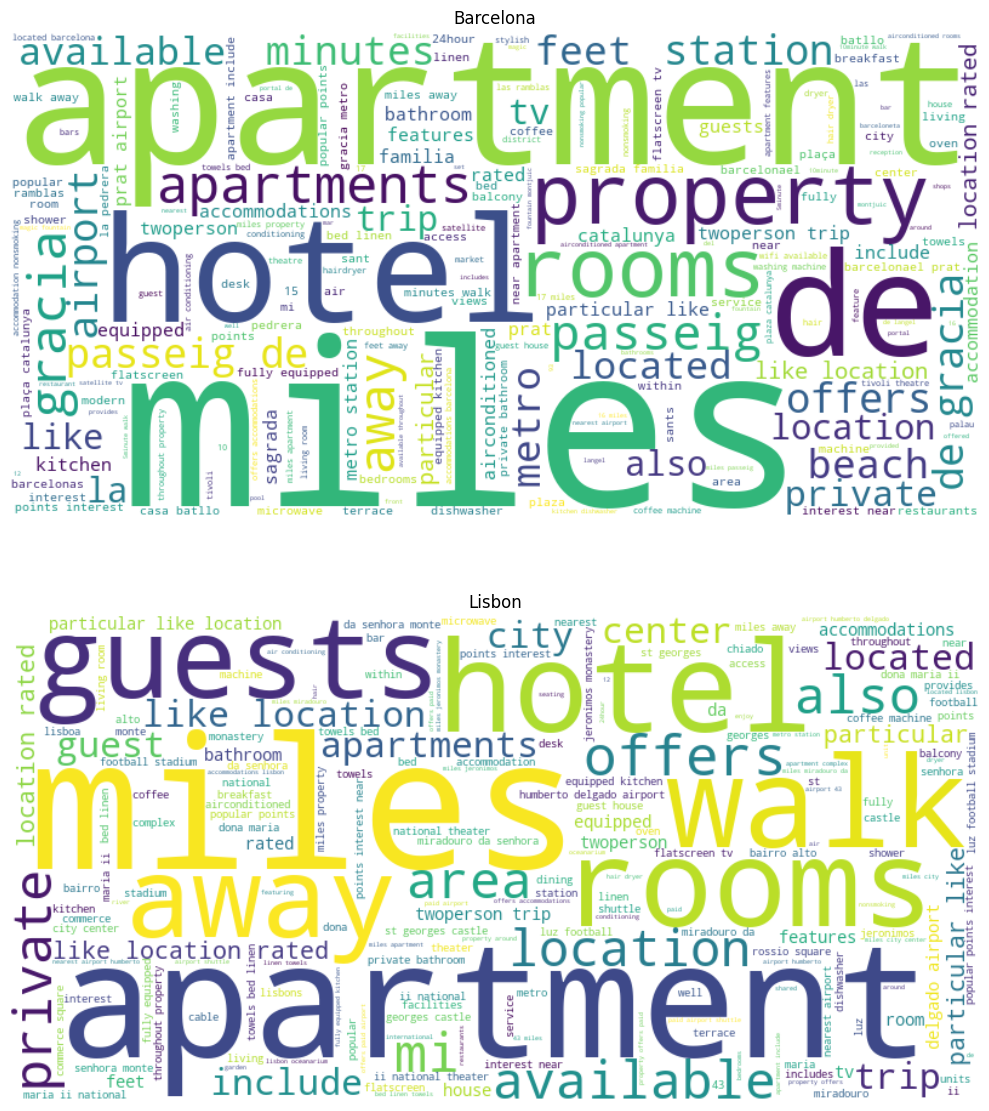

In [18]:

# Convert the TF-IDF matrix to a DataFrame for easier manipulation
tfidf_df_B = pd.DataFrame(tfidf_matrix_B.toarray(), columns=tfidf_vectorizer_B.get_feature_names_out())
tfidf_df_L = pd.DataFrame(tfidf_matrix_L.toarray(), columns=tfidf_vectorizer_L.get_feature_names_out())

# -------------------------------
# Create the word cloud for Barcelona
# -------------------------------

# Sum the TF-IDF scores for each term across all Barcelona hotel descriptions
word_scores_B = tfidf_df_B.sum(axis=0).to_dict()
word_scores_L = tfidf_df_L.sum(axis=0).to_dict()

# Generate the word cloud for Barcelona
wordcloud_B = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_scores_B)
wordcloud_L = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_scores_L)


# -------------------------------
# Plot both word clouds one above the other
# -------------------------------
plt.figure(figsize=(10, 12))

# Barcelona word cloud on the top
plt.subplot(2, 1, 1)
plt.imshow(wordcloud_B, interpolation='bilinear')
plt.axis("off")
plt.title("Barcelona")

# Lisbon word cloud on the bottom
plt.subplot(2, 1, 2)
plt.imshow(wordcloud_L, interpolation='bilinear')
plt.axis("off")
plt.title("Lisbon")

plt.tight_layout()
plt.show()

## Wordcloud


In [19]:
def generate_wordcloud(text, title, max_words=70, width=800, height=400, background_color='white', colormap='viridis'):
    """
    Generates and displays a word cloud from the given text.
    
    Parameters:
        text (str): The text to generate the word cloud from.
        title (str): The title for the word cloud plot,
        max_words (int): Maximum number of words to include in the word cloud.
        width (int): Width of the word cloud image.
        height (int): Height of the word cloud image.
        background_color (str): Background color for the word cloud.
        colormap (str): Colormap to use for the word cloud.
    """
    # Generate the word cloud
    wordcloud = WordCloud(
        width=width,
        height=height,
        background_color=background_color,
        colormap=colormap,
        max_words=max_words,
        stopwords= set(),
        random_state=42
    ).generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(15, 7.5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()


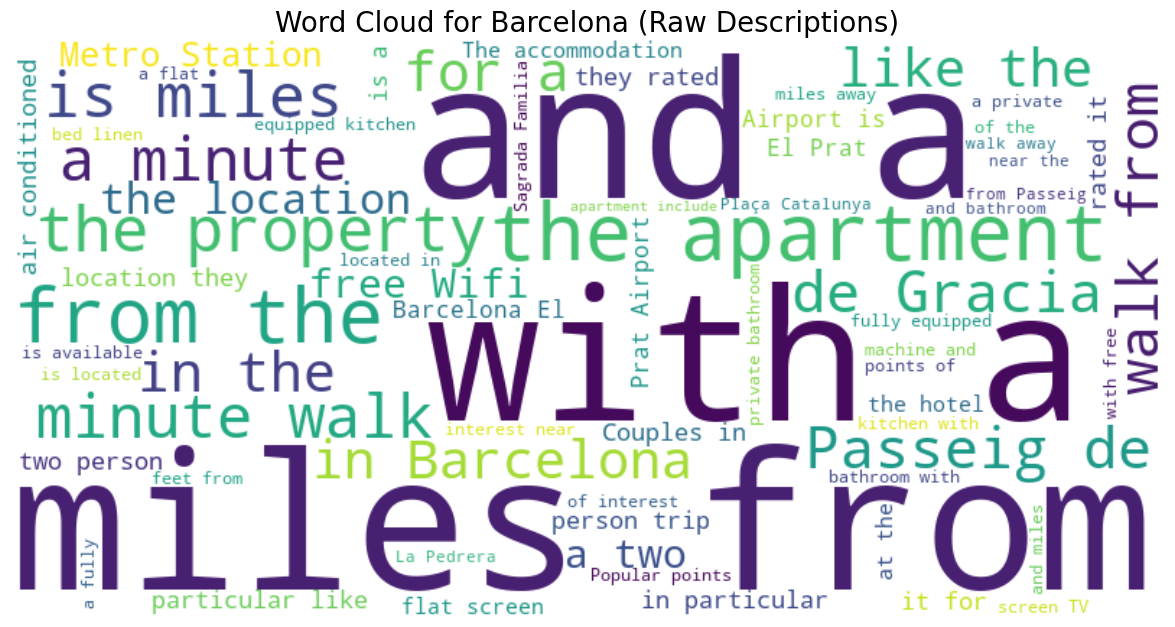

In [20]:
# Concatenate all raw descriptions into a single string
text_B_raw = " ".join(df_B['description'].astype(str))

# Generate and display the word cloud
generate_wordcloud(
    text=text_B_raw,
    title='Word Cloud for Barcelona (Raw Descriptions)',
    

)



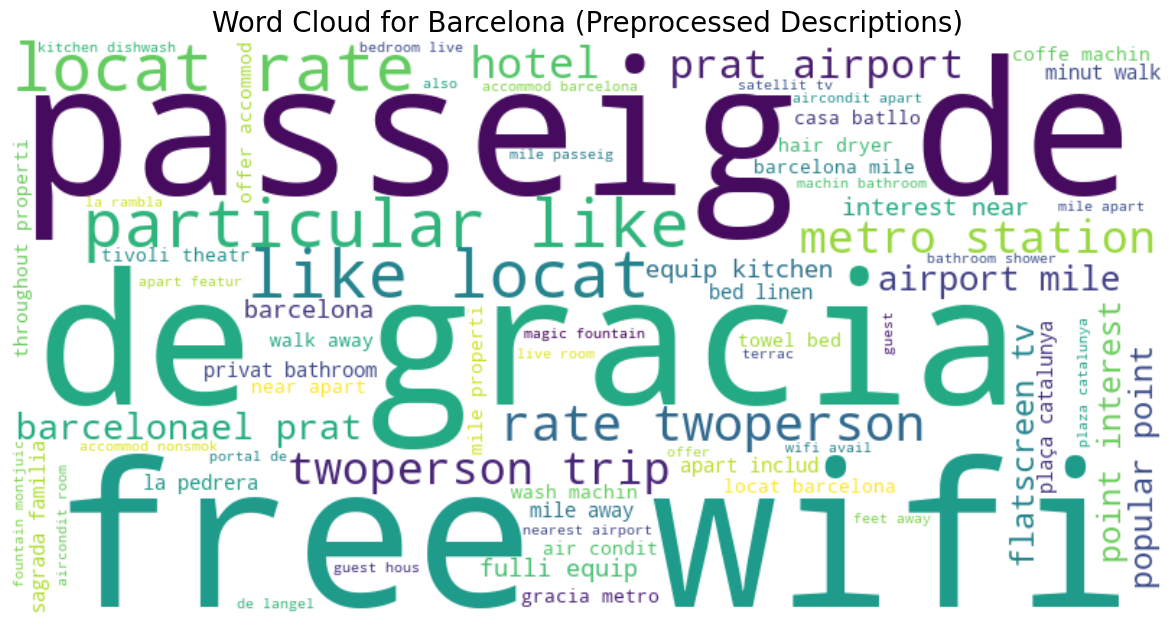

In [21]:
# Concatenate all preprocessed descriptions into a single string
text_B_preproc = " ".join(df_B['description_preproc'].astype(str))

# Generate and display the word cloud
generate_wordcloud(
    text=text_B_preproc,
    title='Word Cloud for Barcelona (Preprocessed Descriptions)'
)



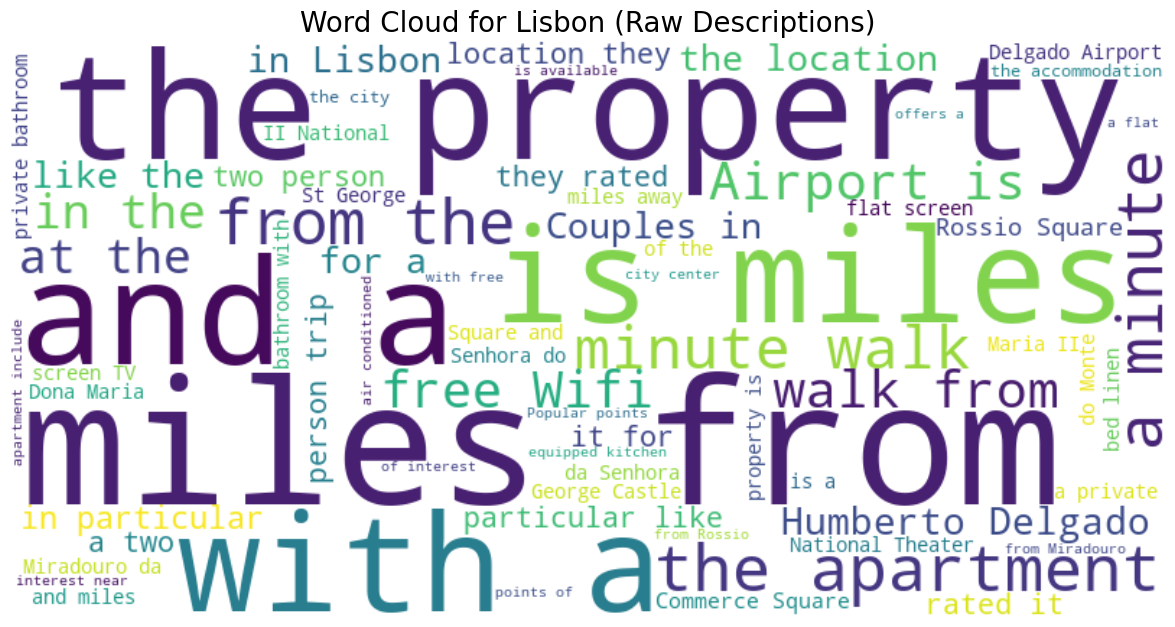

In [22]:
# Concatenate all raw descriptions into a single string
text_L_raw = " ".join(df_L['description'].astype(str))

# Generate and display the word cloud
generate_wordcloud(
    text=text_L_raw,
    title='Word Cloud for Lisbon (Raw Descriptions)'
)



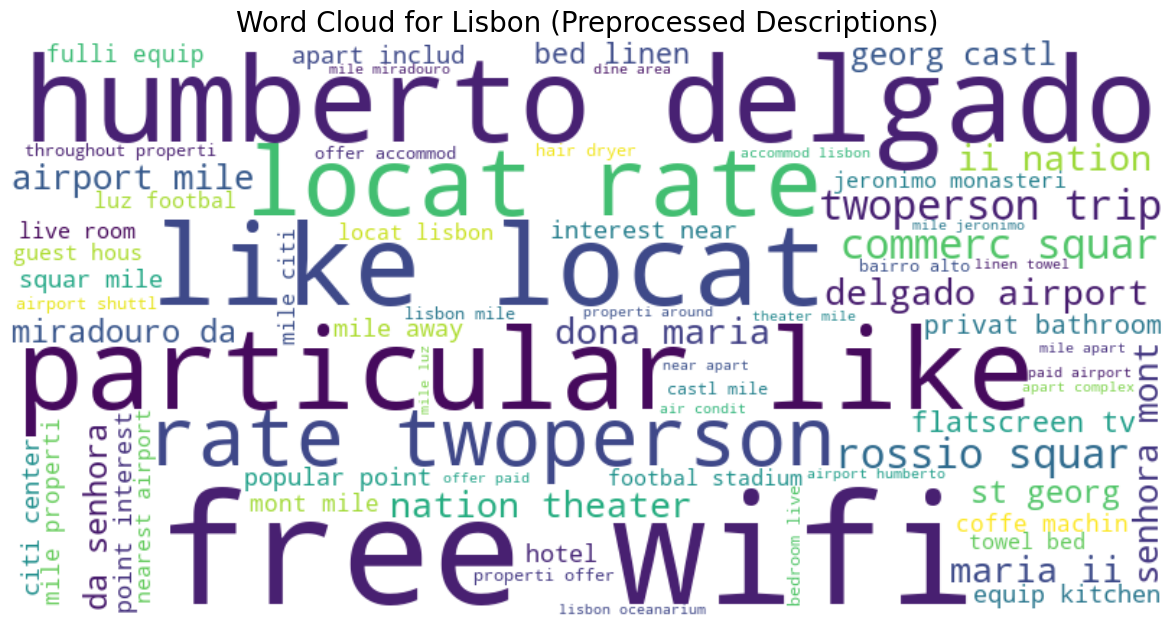

In [23]:
# Concatenate all preprocessd descriptions into a single string
text_L_preproc = " ".join(df_L['description_preproc'].astype(str))

# Generate and display the word cloud
generate_wordcloud(
    text=text_L_preproc,
    title='Word Cloud for Lisbon (Preprocessed Descriptions)'
)



# Exercise 3

## prepare date

In [24]:
# Prepare data to run fixed effects model

#Add 'city' column
df_B['city'] = 'Barcelona'
df_L['city'] = 'Lisbon'

# Add 'treated' indicator: 1 for treated group (Barcelona), 0 for control group (Lisbon)
df_B['barcelona'] = 1
df_L['barcelona'] = 0

# Melt the DataFrames from wide to long format
df_B_long = df_B.melt(
    id_vars=['name', 'description', 'rating', 'reliable_info', 'reviews', 'city', 'barcelona', 'description_preproc'],
    value_vars=['price_1', 'price_2'],
    var_name='time_period',
    value_name='price'
)

df_L_long = df_L.melt(
    id_vars=['name', 'description', 'rating', 'reliable_info', 'reviews', 'city', 'barcelona', 'description_preproc'],
    value_vars=['price_1', 'price_2'],
    var_name='time_period',
    value_name='price'
)

# Combine both DataFrames
df_combined = pd.concat([df_B_long, df_L_long], ignore_index=True)

# Create 'Post' indicator: 1 if 'price_2' (Post-treatment), 0 if 'price_1' (Pre-treatment)
df_combined['event'] = df_combined['time_period'].apply(lambda x: 1 if x == 'price_2' else 0)

# Create interaction term 'Post*Treated'
df_combined['event_barcelona'] = df_combined['event'] * df_combined['barcelona']

# Handle missing values and ensure 'price' is numeric
df_combined = df_combined.dropna(subset=['price'])
df_combined['price'] = pd.to_numeric(df_combined['price'], errors='coerce')

# Convert 'reliable_info' to numeric if it's not
if df_combined['reliable_info'].dtype == 'object':
    df_combined['reliable_info'] = pd.get_dummies(df_combined['reliable_info'], drop_first=True)

# Inspect the combined DataFrame
df_combined.head()

,name,description,rating,reliable_info,reviews,city,barcelona,description_preproc,time_period,price,event,event_barcelona
0,unite hostel barcelona,"Set in Barcelona, 1312 feet from Nova Icaria, ...",8.0,1,8408.0,Barcelona,1,set barcelona 1312 feet nova icaria unit hoste...,price_1,1284.0,0,0
1,pensión coral,"Located behind Sant Jaume Square, this guest h...",7.8,1,3060.0,Barcelona,1,locat behind sant jaum squar guest hous locat ...,price_1,603.0,0,0
2,apartaments sant jordi girona 97,"In Barcelona’s Eixample district, these elegan...",8.2,1,1344.0,Barcelona,1,barcelona eixampl district eleg apart 220 yard...,price_1,1067.0,0,0
3,ronda house,Ronda House is set just off Ronda Sant Antoni ...,8.4,1,9740.0,Barcelona,1,ronda hous set ronda sant antoni avenu 10 minu...,price_1,1049.0,0,0
4,ecozentric,"Ecozentric is in central Barcelona, just a 5-m...",7.4,0,1634.0,Barcelona,1,ecozentr central barcelona 5minut walk plaza c...,price_1,813.0,0,0


## 1. simple dif in dif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                 8.255e+26
Date:                Sun, 02 Feb 2025   Prob (F-statistic):           2.46e-14
Time:                        22:55:57   Log-Likelihood:                -23507.
No. Observations:                2890   AIC:                         4.702e+04
Df Residuals:                    2886   BIC:                         4.705e+04
Df Model:                           3                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1507.2923   5.54e-12   2.

/opt/anaconda3/envs/BSE/lib/python3.13/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


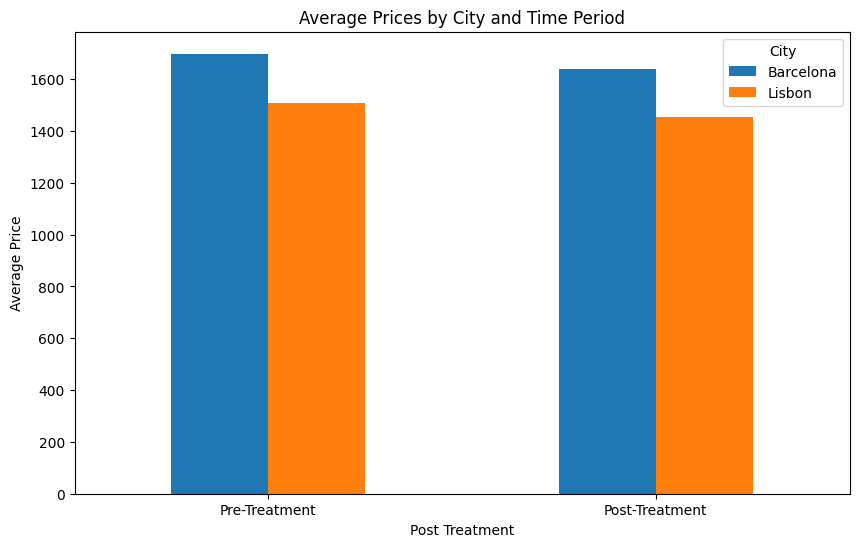

In [25]:
# Define the regression formula
formula = 'price ~ barcelona + event + event_barcelona'

# Fit the fixed effects DiD model with clustered standard errors at the city level
model = smf.ols(formula=formula, data=df_combined).fit(cov_type='cluster', cov_kwds={'groups': df_combined['city']})

# Display the regression results
print(model.summary())

# ---------------------------
# Visualization
# ---------------------------

# Calculate average prices by city and time period
avg_prices = df_combined.groupby(['city', 'event'])['price'].mean().reset_index()

# Pivot for plotting
avg_prices_pivot = avg_prices.pivot(index='event', columns='city', values='price')

# Plot average prices
avg_prices_pivot.plot(kind='bar', figsize=(10,6))
plt.title('Average Prices by City and Time Period')
plt.xlabel('Post Treatment')
plt.ylabel('Average Price')
plt.xticks([0,1], ['Pre-Treatment', 'Post-Treatment'], rotation=0)
plt.legend(title='City')
plt.show()


The

In [26]:
# dif in dif with controls: number of reviews, rating and reliable info
formula = 'price ~ barcelona + event + event_barcelona + reviews + rating + reliable_info'

# Fit the fixed effects DiD model with clustered standard errors at the city level
model = smf.ols(formula=formula, data=df_combined).fit(cov_type='cluster', cov_kwds={'groups': df_combined['city']})

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     10.92
Date:                Sun, 02 Feb 2025   Prob (F-statistic):              0.187
Time:                        22:55:57   Log-Likelihood:                -23426.
No. Observations:                2890   AIC:                         4.687e+04
Df Residuals:                    2883   BIC:                         4.691e+04
Df Model:                           6                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1013.7067    371.679     

/opt/anaconda3/envs/BSE/lib/python3.13/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 1
  warnings.warn('covariance of constraints does not have full '


## 2. generate controls from text

The wordclouds suggest that we have scraped two main types of accomodations, apartements and hotels. As the effect of the event on prices could be different depending on the type, we will generate a variable identifying the various accomodation types in order to measure heterogenous treatment effects across the types.

In [31]:
def classify_accommodation(text):
    text_lower = text.lower()
    
    # Check for "apartement"
    if "apartment" in text_lower:
        return "Apartment"
    
    # Check for "hotel"
    elif "hotel" in text_lower:
        return "Hotel"
    
    # Check for additional known types
    elif "hostel" in text_lower or "hostal":
        return "Hostel"

    elif "guesthouse" in text_lower or "bed and breakfast" in text_lower:
        return "Guesthouse/B&B"
 
     # If no keywords are found, classify as Other
    else:
        return "Other"
    
df_combined['accommodation_type'] = df_combined['description'].apply(classify_accommodation)
print(df_combined['accommodation_type'].value_counts())

accommodation_type
Apartment    1712
Hotel         702
Hostel        476
Name: count, dtype: int64


## 3. Measure heterogenous treatment effects across accomodation types

In [30]:

# Run a DiD regression with triple interactions for accommodation type.
# Here, "C(accommodation_type)" tells statsmodels to create dummy variables for the category.
model = smf.ols(
    "price ~ event * barcelona * C(accommodation_type)",
    data=df_combined
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     30.74
Date:                Sun, 02 Feb 2025   Prob (F-statistic):           4.76e-62
Time:                        22:55:57   Log-Likelihood:                -23366.
No. Observations:                2890   AIC:                         4.676e+04
Df Residuals:                    2878   BIC:                         4.683e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------